Chelsea Zackey 
<br>CIS 5526
<br>11/16/2020

# HW 6: Neural Network

In this guided tutorial, we will start with neural network. We will learn how to build and a train a neural network using Python library Keras.

If you need an introduction to CNNs, you can read this: https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac

## Part 0: Classify hand-written digits

We will take a look at a first concrete example of a neural network using Keras library: https://keras.io/. First, you have to install Keras library. Here is the instructions: https://keras.io/about. As you saw in documentation you have first to install TensorFlow, Theano, or CNTK and then Keras library. We recommend the TensorFlow backend. (For most of you: just use commands 'pip install tensorflow' followed by 'pip install keras') <br>
We will learn how to classify hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this first example right away. Don't worry if some steps seem arbitrary or look like magic to you! We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you get deep in machine learning field, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

Let us first import keras:

In [1]:
import keras
keras.__version__

'2.4.3'

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels.<br>
Let's have a look at the training data:

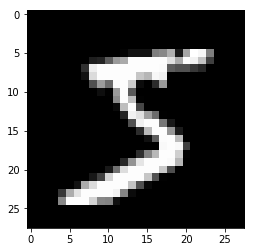

This is a handwritten number  5
Shape of input matrix:  (60000, 28, 28)


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

image_nr = 0
plt.imshow(train_images[image_nr], cmap='gray', vmin=0, vmax=255)
plt.show()
print('This is a handwritten number ', train_labels[image_nr])

print('Shape of input matrix: ', train_images.shape)

#### Question 1: The 'shape' of the matrix is (60000, 28, 28). What do each of these numbers mean?

**Soln 1**: The shape of the matrix being (60000, 28, 28) indicates that it comprises 60000 different training examples (images), each of which comprise a 28 x 28 grid of pixels. 

Our workflow will be as follows: first we will present our neural network with the training data, train_images, and train_labels. The network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for test_images, and we will verify if these predictions match the labels from test_labels. Let's build our network:

In [4]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

The core building block of neural networks is the "layer", a data-processing module which you can conceive as "transforming" your data. Some  data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully  representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple (or sometimes more complex) layers which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a  succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

#### Question 2: Search internet and keras help to understand what "softmax" is doing. Can you explain why it is a popular choice for mutlti-class classification problems?

**Soln 2**: In general, a softmax function is one that maps an n-dim vector of real numbers to an n-dim vector comprising entries that fall within the interval [0,1] and together sum to 1, which allows us to consider the output as a probability distrubtion of a random variable assuming n possible states. As explained by the Keras API, the softmax activation function used in this package is equivalent to the usual unit softmax function, for which the entries of the input vector are taken to be the log-odds (logarithm of the ratio between the probability that an example belongs to a certain category and the probability that it does not) of the output distribution. In the case of multi-class classificaton problems, this is appears to be a very intuitive solution approach considering that the larger the determined odds (and therefore log-odds) are that an example belongs to a particular class, the larger the relative probability of it belonging to that class is as reported by the softmax function output, which makes it easier for a classifier to narrow down which among n classes yields the greatest likelihood of being the correct target. 

#### Question 3: Could you explain why we use 'relu' in first layer and 'softmax' in the second layer? A friend tells you that 'tanh' can be a good activation function. To try it out, would you replace 'relu', 'softmax' or both? Justify your answer.

**Soln 3**: General idea: relu treats every input that is negative in value as equally unlikely, as replacing their values with 0 associates all negative inputs with the probability $$\frac{1}{\sum_{i=1}^H e^{z_i}}.$$ If there are $k \leq H$ total inputs that are negative in value, applying relu followed by softmax results in all $k$ respective targets to have a shared likelihood of being the correct target class of $$\frac{1}{k + \sum_{i: z_i > 0}e^{z_i}},$$ leaving only a total probability of $$1-\frac{k}{k+\sum_{i: z_i > 0}e^{z_i}}$$ that the true target class belongs to the $H-k$ inputs that were positive in value, leaving less room for increased confidence in the classifier's final prediction. Hence, this makes a case for the argument of replacing the relu activation function with tanh. 

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: this is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function. 'rmsprop' is specific type of the gradient descent algorithm. Keras offers a few versions of the optimizer.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

In [5]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#### Question 4: Search internet and keras documentation to understand 'categorical_crossentropy'. Could you explain why we use 'categorical_crossentropy' for loss function in this application?

**Soln 4**: In general, cross-entropy loss is used as the standard loss function for determining the performance of classifiers that output their predictions as probability distributions (each probability in the interval \[0,1\]); i.e., classifiers for which there is a notion of relative "confidence" when predicting the target class of a given example that is proportional to their determined probability that the example indeed belongs to said class. Unlike other loss functions like MSE, cross-entropy loss has the effect of penalizing our classifier along 2 dimensions: error and confidence. That is, when the classifier makes incorrect predictions with increased confidence (which therefore decreases its confidence in predicting the correct class), the loss for this mistake increases exponentially (and vice versa). Categorical cross-entropy loss is a variation of cross-entropy loss tailored to the case in which we have multiple ($\geq 2$) target classes to choose from, hence why this loss function serves our purposes for this application.    

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

As you could see from the result above that labels are digits, ranging from 0 to 9. We will turn each digit into a one-hot vector of length 10.

In [8]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data. We can specify how many epoch of gradient descent are we using (how many passes through the whole data set) and what is the size of mini-batch for a single weigth update.

In [9]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2577 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1036 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0695 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0506 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0372 - accuracy: 0.9890


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an high accuracy (around 98%) on the training data. Now let's check that our model performs well on the test set too:

In [10]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9787


In [11]:
print('test_acc:', test_acc)

test_acc: 0.9786999821662903


Our test set accuracy will be a bit lower than the training set accuracy. 

#### Question 5: What will be an example of overfiting here?
**Soln 5**: One source 

In [12]:
# Question 6 Code - CZ
network.fit(train_images, train_labels, initial_epoch= 5, epochs=10, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0285 - accuracy: 0.9921
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0219 - accuracy: 0.9936
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0165 - accuracy: 0.9953
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0130 - accuracy: 0.9965
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0755 - accuracy: 0.9807
test_acc: 0.9807000160217285


In [13]:
# Question 6 Code - CZ
network.fit(train_images, train_labels, initial_epoch= 10, epochs=25, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 11/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0083 - accuracy: 0.9975: 0s - loss: 0.0082 - accu
Epoch 12/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0058 - accuracy: 0.9984
Epoch 13/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0048 - accuracy: 0.9988
Epoch 14/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0038 - accuracy: 0.9990
Epoch 15/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0030 - accuracy: 0.9991
Epoch 16/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0019 - accuracy: 0.9994
Epoch 17/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0017 - accuracy: 0.9995
Epoch 18/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0016 - accuracy: 0.9995
Epoch 19/25
469/469 [==============================] - 3s 7ms/step - loss: 9.5498e-04 - accuracy: 0.9997
Epoch 20/25
469/469 [==============================] - 3s 7ms

In [14]:
# Question 6 Code - CZ
network.fit(train_images, train_labels, initial_epoch= 25, epochs=50, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 26/50
469/469 [==============================] - 3s 7ms/step - loss: 2.5467e-04 - accuracy: 0.9999
Epoch 27/50
469/469 [==============================] - 3s 7ms/step - loss: 2.5566e-04 - accuracy: 0.9999
Epoch 28/50
469/469 [==============================] - 3s 7ms/step - loss: 1.4280e-04 - accuracy: 1.0000
Epoch 29/50
469/469 [==============================] - 3s 7ms/step - loss: 1.9754e-04 - accuracy: 0.9999
Epoch 30/50
469/469 [==============================] - 4s 8ms/step - loss: 8.2845e-05 - accuracy: 1.0000
Epoch 31/50
469/469 [==============================] - 3s 7ms/step - loss: 1.2970e-04 - accuracy: 1.0000
Epoch 32/50
469/469 [==============================] - 3s 7ms/step - loss: 2.2276e-04 - accuracy: 1.0000
Epoch 33/50
469/469 [==============================] - 3s 7ms/step - loss: 1.3921e-04 - accuracy: 1.0000
Epoch 34/50
469/469 [==============================] - 3s 7ms/step - loss: 1.3439e-04 - accuracy: 0.9999
Epoch 35/50
469/469 [==============================] - 

In [15]:
# Question 6 Code - CZ
network.fit(train_images, train_labels, initial_epoch= 50, epochs=100, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 51/100
469/469 [==============================] - 3s 7ms/step - loss: 1.2962e-08 - accuracy: 1.0000
Epoch 52/100
469/469 [==============================] - 3s 7ms/step - loss: 1.2086e-08 - accuracy: 1.0000
Epoch 53/100
469/469 [==============================] - 3s 6ms/step - loss: 1.1565e-08 - accuracy: 1.0000
Epoch 54/100
469/469 [==============================] - 3s 6ms/step - loss: 1.0999e-08 - accuracy: 1.0000
Epoch 55/100
469/469 [==============================] - 3s 7ms/step - loss: 1.0435e-08 - accuracy: 1.0000
Epoch 56/100
469/469 [==============================] - 4s 8ms/step - loss: 1.0018e-08 - accuracy: 1.0000
Epoch 57/100
469/469 [==============================] - 4s 8ms/step - loss: 9.5586e-09 - accuracy: 1.0000
Epoch 58/100
469/469 [==============================] - 3s 7ms/step - loss: 9.3023e-09 - accuracy: 1.0000
Epoch 59/100
469/469 [==============================] - 3s 6ms/step - loss: 8.9645e-09 - accuracy: 1.0000
Epoch 60/100
469/469 [========================

#### Question 6: Try to play with numbers of epochs and batch_size. What is your result compared to what we got?

**Soln 6**: 

First result (epochs = 5; batch_size = 128): 
    Train loss: 0.0377 - Train accuracy: 0.9889
    Test loss: 0.0676 - Test accuracy: 0.9795
    
My results

epochs = 10; batch_size = 128:
    Train loss: 0.0031 - Train accuracy: 0.9992
    Test loss: 0.0846 - Test accuracy: 0.9813

epochs = 25; batch_size = 128:
    Train loss: 1.0875e-04 - Train accuracy: 1.0000
    Test loss: 0.1134 - Test accuracy: 0.9830
    
epochs = 50; batch_size = 128: 
    Train loss: 1.0631e-08 - Train accuracy: 1.0000
    Test loss: 0.1391 - Test accuracy: 0.9840
    
epochs = 100; batch_size = 128: 
    Train loss: 4.7127e-09 - Train accuracy: 1.0000
    Test loss: 0.1481 - Test accuracy: 0.9843


This concludes our very first example of neural network. We learn how we could build and a train a neural network to classify handwritten digits.

## Part 1:   Convolutional Neural Network (CNN) 

In this Part, we will learn how to train CNNs. CNNs are a very popular type of a neural network, particularly for data that come in a vector, matrix, or tensor (3 or higher dimensional array) form, such as sequences, images, and videos. The main innovation compared to the feedforward neural network, which relies on dense layers is a new type of a layer, called the convolutional layer. A neuron (called the filter) in CNN is a small vector, matrix (e.g., size 3x3 or 5x5) or a tensor that scans the input vector, matrix, or a tensor and produces a new vector, matrix, or a tensor. You can decide to use many such neurons in each convolutional layer.

In additon to the convolutional layer, CNNs also inroduce 'MaxPooling' layer which scans a block of an input matrix and finds the maximum value within each block. An outcome of this operation is reduction of the matrix size. Finally, CNNs also use the 'Flatten' operation which vectorizes the input matrix (e.g., converts a 10x10 input matrix into a vector of size 100). After the 'Flatten" operation CNNs typically add one or more dense layers.

For more details about CNN, please consult this blog: 
 https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac

All the code is provided. The code is allowing you to prepare the data and train a CNN that classifies which digit is written in an image provided at its input. We will show how you can train 4 different CNN, ranging from simple to more complex, and let you observe how it impacts classification accuracy. 

CNN training can take quite a bit of time (particularly if GPU isn't used), so we will create a training data set that uses a subset of available data. In particular, we will define the classification problem as recognizing whether a digit in an image is 7 or not. The following piece of code shows the data preparation steps.

In [70]:
#Import the required libraries
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import Adam

The following block selects a subset of images from the MNIST data.

In [71]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test_orig = X_test

# Select the subset from the train data for the sake of time.
np.random.seed(1)  # for reproducibilty!!
# The subset is composed of all the examples where the digit is 7, and 10,000 examples are not 7.
sevens = np.where(y_train == 7)[0].tolist()
not_sevens = np.where(y_train != 7)[0].tolist()
num_keepers = 10000
not_sevens = np.random.choice(not_sevens, num_keepers, replace=False).tolist()

subset = sevens + not_sevens
np.random.shuffle(subset) # shuffle the input

X_train = X_train[subset, :, :]
y_train = y_train[subset]

#### Question 1: Write some code ito check how many 'sevens' and how many 'not_sevens' there are in our training data? What is the accuracy of a classifier that always predicts that the input is not a seven?

**Soln**: As determined by our code below, our training subset has a total of 16265 examples, with 6265 examples being 7's and 10,000 examples not being 7's. The accuracy of a classifier that always predicts that the input is not a 7 would therefore be (10000/16265)\*100 = 61.5%.

In [72]:
# CZ- Code for Question 1
# Determine how many examples are 7's and how many are not 7's
print("Total number of '7' examples: "+str(len(sevens)))
print("Total number of not '7' examples: "+str(len(not_sevens)))

Total number of '7' examples: 6265
Total number of not '7' examples: 10000


The following code creates training and test data. It would be great if you can spend a few minutes trying to understand what is going on.

In [73]:
from keras import backend as K

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

# Normalize the images:

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


# Converting the labels to binary classification(Seven =1,Not Seven=0)
Y_train = (y_train == 7).astype(int)
Y_test = (y_test == 7).astype(int)

# Converting the classes to its binary categorical form
nb_classes = 2
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

### Train a simple CNN (CNN, model 1)

The following code will show how you can define CNN, train it, and test its accuracy. 

**Step 0.** The following is a preparation step, specifying the hyperparameters.

In [74]:
# -- Initializing the values for the convolution neural network

nb_epoch = 2  # kept very low! Please increase if you have GPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# SGD
optimizer = Adam(lr=0.0002, amsgrad=True)

**Step 1.** In this step we define architecture of the CNN

Each line "model.add()" adds another layer to the neural network. The type of layer must be specified. 

In [75]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', 
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(26, 26)))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

We can check the configuration of the above model by call model.summary()

In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 386
Trainable params: 386
Non-trainable params: 0
________________________________________________________

#### Question 2: From the above summary, can you explain the architecture of this CNN?

**Step 2.** Here, we define the loss function. You will see that the loss function is not Mean Square Error, but Cross Entropy. Cross Entropy is a very popular choice when training neural networks for classification problems.

In [77]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

**Step 3.** This line of code trains CNN. This is going to take about a minute. Observe that we will only have 2 epochs of training, for the sake of time. You will see how the accuracy on training and valiadion data evolves during training.

In [78]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_data=(X_test, Y_test))

Epoch 1/2
255/255 [==============================] - 4s 16ms/step - loss: 0.6767 - accuracy: 0.5752 - val_loss: 0.5321 - val_accuracy: 0.8972
Epoch 2/2
255/255 [==============================] - 3s 13ms/step - loss: 0.6534 - accuracy: 0.6148 - val_loss: 0.5090 - val_accuracy: 0.8972


Let us plot the accuracy. 

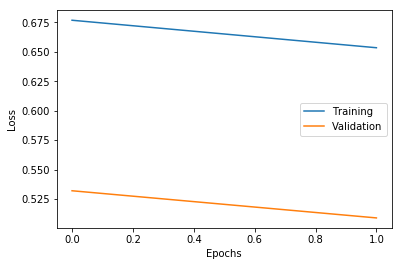

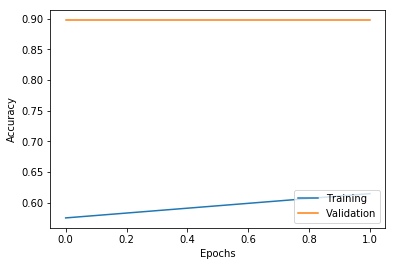

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

**Step 4.** Evaluate the accuracy on test data.

In [80]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.5090412497520447
Test Accuracy: 0.8971999883651733


Let us visualize our model Predictions!

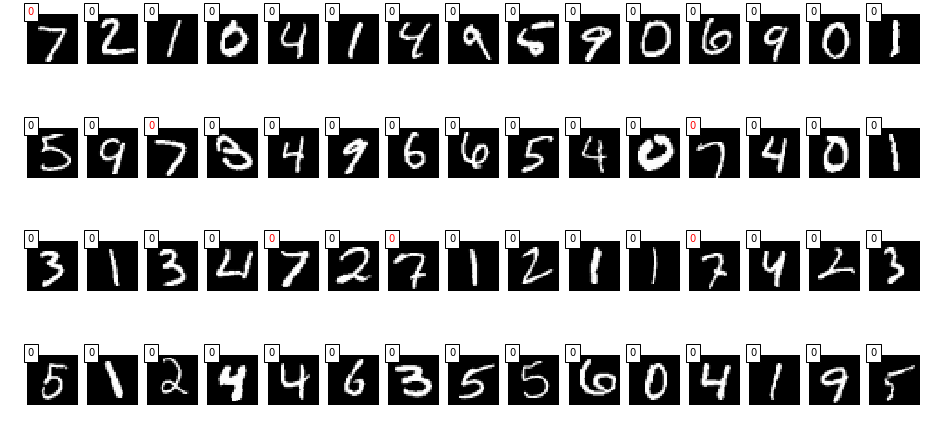

In [81]:
def show_results(model):
    rows = 4
    columns = 15
    sliced = rows*columns
    predicted = model.predict(X_test[:sliced]).argmax(-1)

    plt.figure(figsize=(16,8))
    for i in range(sliced):
        plt.subplot(rows, columns, i+1)
        plt.imshow(X_test_orig[i], cmap='gray', vmin=0, vmax=255)
        color = 'black' if Y_test[i, 1] == predicted[i] else 'red'
        plt.text(0, 0, predicted[i], color=color, 
                 bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')

show_results(model)

#### Question 3: Can you discuss the performance of the CNN model? What kind of errors is it making?

#### Question 4: Go back to step 0, change number of epochs to 10 and run it again. How did it impact the accuracy?

### Train a more complicated CNN (CNN, model 2)

Now, we will define a more complicated CNN architecture. We will train it for only 5 epochs to save time.

In [82]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                86544     
_________________________________________________________________
activation_3 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [84]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

nb_epoch = 5
model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
255/255 [==============================] - 5s 19ms/step - loss: 0.1185 - accuracy: 0.9599 - val_loss: 0.0751 - val_accuracy: 0.9755
Epoch 2/5
255/255 [==============================] - 5s 20ms/step - loss: 0.0764 - accuracy: 0.9741 - val_loss: 0.0648 - val_accuracy: 0.9786
Epoch 3/5
255/255 [==============================] - 5s 19ms/step - loss: 0.0646 - accuracy: 0.9793 - val_loss: 0.0486 - val_accuracy: 0.9840
Epoch 4/5
255/255 [==============================] - 4s 16ms/step - loss: 0.0567 - accuracy: 0.9824 - val_loss: 0.0445 - val_accuracy: 0.9868
Epoch 5/5
255/255 [==============================] - 5s 18ms/step - loss: 0.0505 - accuracy: 0.9846 - val_loss: 0.0397 - val_accuracy: 0.9879


In [85]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.039743829518556595
Test accuracy: 0.9879000186920166


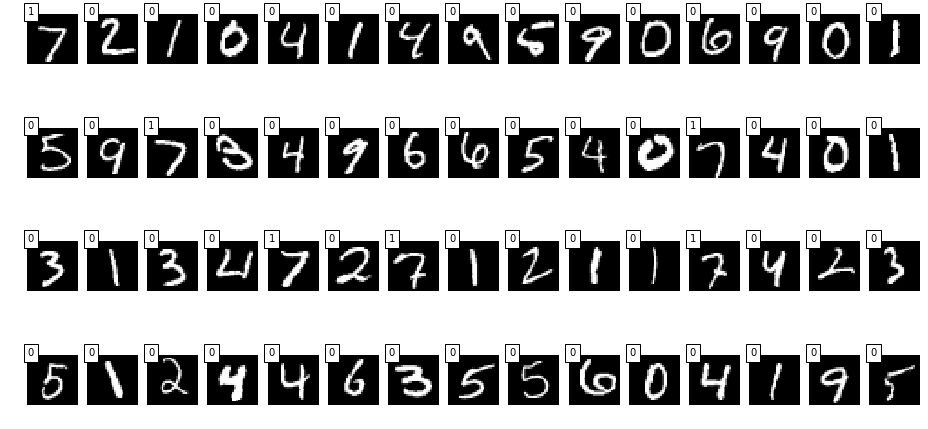

In [86]:
show_results(model)

#### Question 5: Can you explain the architecture of this CNN (model 2) and how is it different from the first CNN you trained (model 1)? Compare their performance by looking at the visualizstions.

### Adding more convolutional layers and MaxPooling layers (CNN, model 3)

Now, we will define an even more complicated CNN architecture.

In [87]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [88]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)               

In [89]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
255/255 [==============================] - 6s 25ms/step - loss: 0.1409 - accuracy: 0.9520 - val_loss: 0.0807 - val_accuracy: 0.9735
Epoch 2/5
255/255 [==============================] - 7s 26ms/step - loss: 0.0733 - accuracy: 0.9757 - val_loss: 0.0485 - val_accuracy: 0.9856
Epoch 3/5
255/255 [==============================] - 7s 28ms/step - loss: 0.0593 - accuracy: 0.9817 - val_loss: 0.0427 - val_accuracy: 0.9872
Epoch 4/5
255/255 [==============================] - 7s 27ms/step - loss: 0.0508 - accuracy: 0.9843 - val_loss: 0.0377 - val_accuracy: 0.9889
Epoch 5/5
255/255 [==============================] - 7s 28ms/step - loss: 0.0448 - accuracy: 0.9860 - val_loss: 0.0367 - val_accuracy: 0.9888


In [90]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.036701612174510956
Test accuracy: 0.9887999892234802


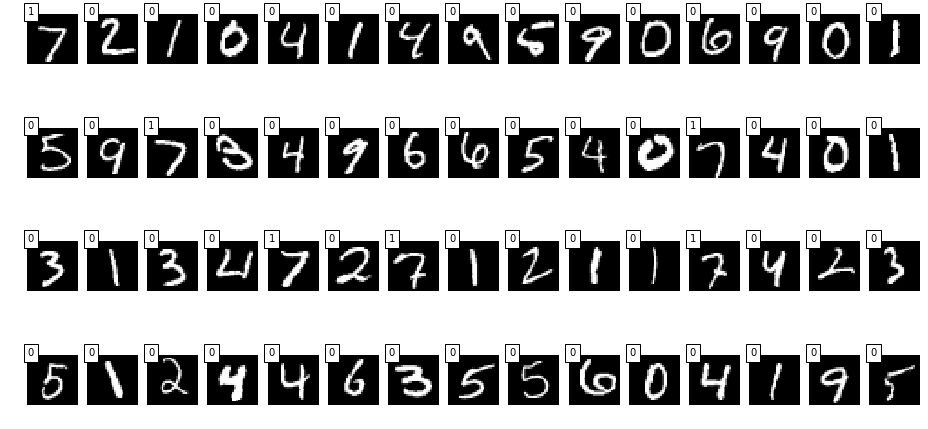

In [91]:
show_results(model)

Another small improvement.

### Wrapping all the code together and play with hyperparameters

The code below wraps up the pieces of codes above into a single function and allows you to play with the hyperparameters by changing the arguments. Try to get the best performance with only 2 training epochs!


In [ ]:
nb_epoch = 2

In [60]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model(num_conv = 1, conv_activation = "relu", num_dense = 1, dense_activation  = "relu", 
               dropout = True, max_pooling = True):
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation(conv_activation))
    
    for i in range(num_conv-1):
        model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
        model.add(Activation(conv_activation))
        
    if max_pooling is True:
        model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
        
    if dropout is True:
        model.add(Dropout(0.25))
    
    model.add(Flatten())

    if dropout is True:
        model.add(Dropout(0.5))
    
    for i in range(num_dense-1):
        model.add(Dense(128))
        model.add(Activation(dense_activation))
        
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(num_conv , 'convolutional layers,', num_dense, "dense layers")
    if max_pooling: print("With max pooling")
    if dropout: print("With dropout")
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    show_results(model)

An example of running this function

In [ ]:
# Here is an example of running build_model() with default hyperparameters
build_model()

In [ ]:
# Here is an example of running build_model() with new hyperparameters
build_model(num_conv = 3, num_dense = 3)

In [ ]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model()

#### Question 6: Try to change some of the **hyperparameters** without exploding the computational resources on your computer and only using 2 training epochs. 
What is the best accuracy you can get? How many trainable parameters does your model have? How long does the training take?

#### Question 7 (20% of the grade)

Can you train a model to output 10 classes instead of 2 binary classes? We can use this model to classify images into 10 digits of the mnist data set. Again, we will only train our model on a subset of the training data. The following steps will help you to build such a model.

    * 1. Select 20,000 examples randomly from X_train, since we want all 10 digits present in our training data.
    * 2. Convert Y_train and Y_test to categorical.
    * 3. Call the build_model() on the X_train and Y_train.

#### Question 8 (40% of the grade) 

Train a model on CIFAR10 dataset, which is described in https://www.cs.toronto.edu/~kriz/cifar.html. You can load the dataset from Keras, too. CIFAR10 small image classification contains 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

```python
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
```

Again, we will only train our model on a subset of the training data. The following steps will help you to build such a model.

    * 1. Select 20,000 examples randomly from X_train, since we want all 10 categories present in our training data.
    * 2. Convert Y_train and Y_test to categorical.
    * 3. Call the build_model() on the X_train and Y_train.

In [1]:
from keras.datasets import cifar10

# load CIFAR10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# randomly select subset of training data
keep = 20000 # number of examples to keep for training
np.random.seed(1)
#y_train.shape
train_set = y_train
train_set = np.random.choice(train_set.reshape(50000), keep, replace=False).tolist()
x_train = x_train[train_set, :, :]
y_train = y_train[train_set]

print(x_train)
print(y_train)
# convert labels to categorical type
#y_train= to_categorical(y_train)
#y_test = to_categorical(y_test)

NameError: name 'np' is not defined

In [94]:
# redefine show_results method
def show_results(model):
    rows = 4
    columns = 15
    sliced = rows*columns
    predicted = model.predict(x_test[:sliced]).argmax(-1)

    plt.figure(figsize=(16,8))
    for i in range(sliced):
        plt.subplot(rows, columns, i+1)
        plt.imshow(x_test_orig[i], cmap='gray', vmin=0, vmax=255)
        color = 'black' if y_test[i, 1] == predicted[i] else 'red'
        plt.text(0, 0, predicted[i], color=color, 
                 bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')

# redefine build_model method
def build_model(num_conv = 1, conv_activation = "relu", num_dense = 1, dense_activation  = "relu", 
               dropout = True, max_pooling = True):
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation(conv_activation))
    
    for i in range(num_conv-1):
        model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
        model.add(Activation(conv_activation))
        
    if max_pooling is True:
        model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
        
    if dropout is True:
        model.add(Dropout(0.25))
    
    model.add(Flatten())

    if dropout is True:
        model.add(Dropout(0.5))
    
    for i in range(num_dense-1):
        model.add(Dense(128))
        model.add(Activation(dense_activation))
        
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(x_train, y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(x_test, y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(num_conv , 'convolutional layers,', num_dense, "dense layers")
    if max_pooling: print("With max pooling")
    if dropout: print("With dropout")
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    show_results(model)


# run build_model on CIFAR10 data
build_model()

Epoch 1/5


ValueError: in user code:

    /Users/edenzackey/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Users/edenzackey/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/edenzackey/.local/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/edenzackey/.local/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/edenzackey/.local/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/edenzackey/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Users/edenzackey/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /Users/edenzackey/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /Users/edenzackey/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_8 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape [None, 32, 32, 3]
